<a href="https://colab.research.google.com/github/Sachinthana-Pathiranage/Sri-Ayu-Ayurvedic-Care/blob/Pamoda/Pamoda's%20Notebooks/FESymptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
import json
from google.colab import drive

In [2]:
#load the dataset
data = pd.read_csv('/content/Disease_Prediction_dataset.csv')

# Understanding the dataset

In [3]:
data.head(10)

,chills,acidity,fatigue,weight_loss,lethargy,cough,high_fever,indigestion,headache,abdominal_pain,...,phlegm,sinus_pressure,chest_pain,dizziness,obesity,muscle_weakness,irritability,polyuria,visual_disturbances,prognosis
0,1,0,0,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,Migraine
1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,Migraine
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Migraine
3,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,Migraine
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,Migraine
5,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,1,1,Migraine
6,1,0,0,1,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,1,Migraine
7,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,0,Migraine
8,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,Migraine
9,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,Migraine


In [4]:
data.tail(10)

,chills,acidity,fatigue,weight_loss,lethargy,cough,high_fever,indigestion,headache,abdominal_pain,...,phlegm,sinus_pressure,chest_pain,dizziness,obesity,muscle_weakness,irritability,polyuria,visual_disturbances,prognosis
725,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,diabetes
726,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,diabetes
727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,diabetes
728,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,diabetes
729,0,0,1,1,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,diabetes
730,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,diabetes
731,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,diabetes
732,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,diabetes
733,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,diabetes
734,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,diabetes


In [5]:
data.columns

Index(['chills', 'acidity', 'fatigue', 'weight_loss', 'lethargy', 'cough',
       'high_fever', 'indigestion', 'headache', 'abdominal_pain', 'vomiting',
       'loss_of_appetite', 'gnawing', 'upper_abdomain_pain', 'burning_ache',
       'swelled_lymph_nodes', 'blurred_and_distorted_vision', 'phlegm',
       'sinus_pressure', 'chest_pain', 'dizziness', 'obesity',
       'muscle_weakness', 'irritability', 'polyuria', 'visual_disturbances',
       'prognosis'],
      dtype='object')

In [6]:
data.shape

(735, 27)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   chills                        735 non-null    int64 
 1   acidity                       735 non-null    int64 
 2   fatigue                       735 non-null    int64 
 3   weight_loss                   735 non-null    int64 
 4   lethargy                      735 non-null    int64 
 5   cough                         735 non-null    int64 
 6   high_fever                    735 non-null    int64 
 7   indigestion                   735 non-null    int64 
 8   headache                      735 non-null    int64 
 9   abdominal_pain                735 non-null    int64 
 10  vomiting                      735 non-null    int64 
 11  loss_of_appetite              735 non-null    int64 
 12  gnawing                       735 non-null    int64 
 13  upper_abdomain_pain 

In [8]:
pd.isnull(obj=data).sum()

,0
chills,0
acidity,0
fatigue,0
weight_loss,0
lethargy,0
cough,0
high_fever,0
indigestion,0
headache,0
abdominal_pain,0


In [9]:
data['prognosis'].unique()

array(['Migraine', 'Common_cold', 'gastritis', 'diabetes'], dtype=object)

In [10]:
data['prognosis'].value_counts()

,count
prognosis,
Migraine,200
Common_cold,200
gastritis,179
diabetes,156


In [11]:
data.describe()

,chills,acidity,fatigue,weight_loss,lethargy,cough,high_fever,indigestion,headache,abdominal_pain,...,blurred_and_distorted_vision,phlegm,sinus_pressure,chest_pain,dizziness,obesity,muscle_weakness,irritability,polyuria,visual_disturbances
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,...,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,0.263946,0.349660,0.413605,0.121088,0.223129,0.219048,0.240816,0.272109,0.327891,0.190476,...,0.293878,0.225850,0.281633,0.317007,0.254422,0.204082,0.277551,0.130612,0.157823,0.258503
std,0.441070,0.477187,0.492815,0.326452,0.416628,0.413883,0.427870,0.445349,0.469765,0.392944,...,0.455847,0.418426,0.450101,0.465627,0.435832,0.403303,0.448096,0.337205,0.364823,0.438110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Check for duplicate rows
duplicates = data.duplicated()

# Count duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates
data = data.drop_duplicates()
print('Duplicate rows removed')

Number of duplicate rows: 7
Duplicate rows removed


In [13]:
data.shape

(728, 27)

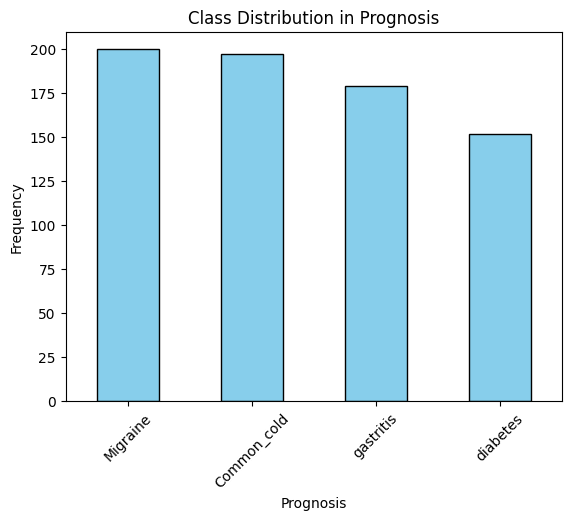

In [14]:
# Bar chart for class distribution
class_counts = data['prognosis'].value_counts()
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution in Prognosis')
plt.xlabel('Prognosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

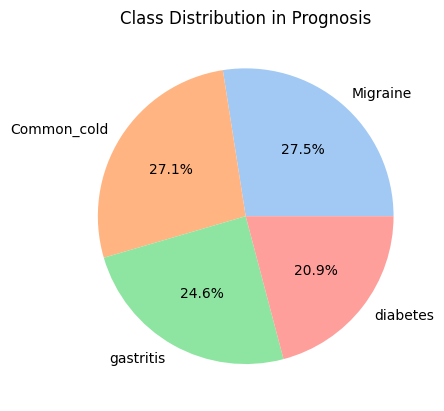

In [15]:
# Pie chart for class distribution
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Class Distribution in Prognosis')
plt.ylabel('')
plt.show()

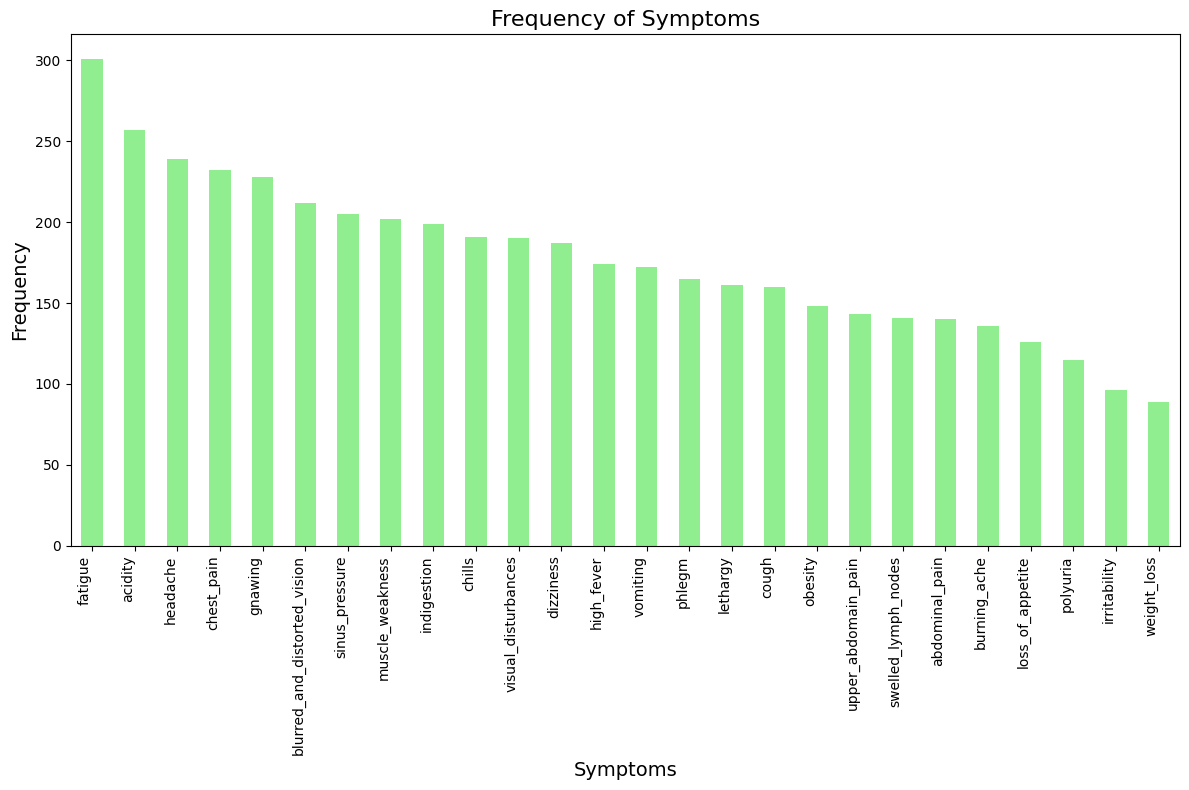

In [16]:
# Frequency of Symptoms
symptom_columns = [col for col in data.columns if col != 'prognosis']
symptom_sums = data[symptom_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
symptom_sums.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Symptoms', fontsize=16)
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align text for better visibility
plt.tight_layout()  # Automatically adjust layout to prevent overlap
plt.show()

In [17]:
# Encoding the target separately
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis']              # Target

# Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
#print only the classes with their label
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Common_cold': 0, 'Migraine': 1, 'diabetes': 2, 'gastritis': 3}


In [18]:
#Dropping the original 'prognosis' column
data = data.drop('prognosis', axis=1)

In [19]:
data.head()

,chills,acidity,fatigue,weight_loss,lethargy,cough,high_fever,indigestion,headache,abdominal_pain,...,blurred_and_distorted_vision,phlegm,sinus_pressure,chest_pain,dizziness,obesity,muscle_weakness,irritability,polyuria,visual_disturbances
0,1,0,0,0,0,1,1,1,1,0,...,0,0,1,1,0,0,1,1,0,0
1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add the encoded target back to the dataset temporarily
data_with_target = data.copy()
data_with_target['prognosis_encoded'] = y_encoded

# Compute correlation matrix
correlation_matrix = data_with_target.corr()

# Extract correlations of features with the target variable, excluding the target itself
target_correlation = correlation_matrix['prognosis_encoded'].drop('prognosis_encoded').sort_values(ascending=False)

# Print the correlations
print("Correlation of features with the target variable (prognosis_encoded):")
print(target_correlation)

Correlation of features with the target variable (prognosis_encoded):
abdominal_pain                  0.446440
burning_ache                    0.422495
upper_abdomain_pain             0.289063
gnawing                         0.243572
indigestion                     0.238388
vomiting                        0.237553
acidity                         0.184336
weight_loss                     0.117711
polyuria                        0.105131
lethargy                        0.090110
fatigue                        -0.001020
blurred_and_distorted_vision   -0.008420
chest_pain                     -0.014986
dizziness                      -0.015017
loss_of_appetite               -0.032673
muscle_weakness                -0.034868
obesity                        -0.056252
visual_disturbances            -0.079374
irritability                   -0.148223
chills                         -0.293100
headache                       -0.309864
high_fever                     -0.315701
sinus_pressure              

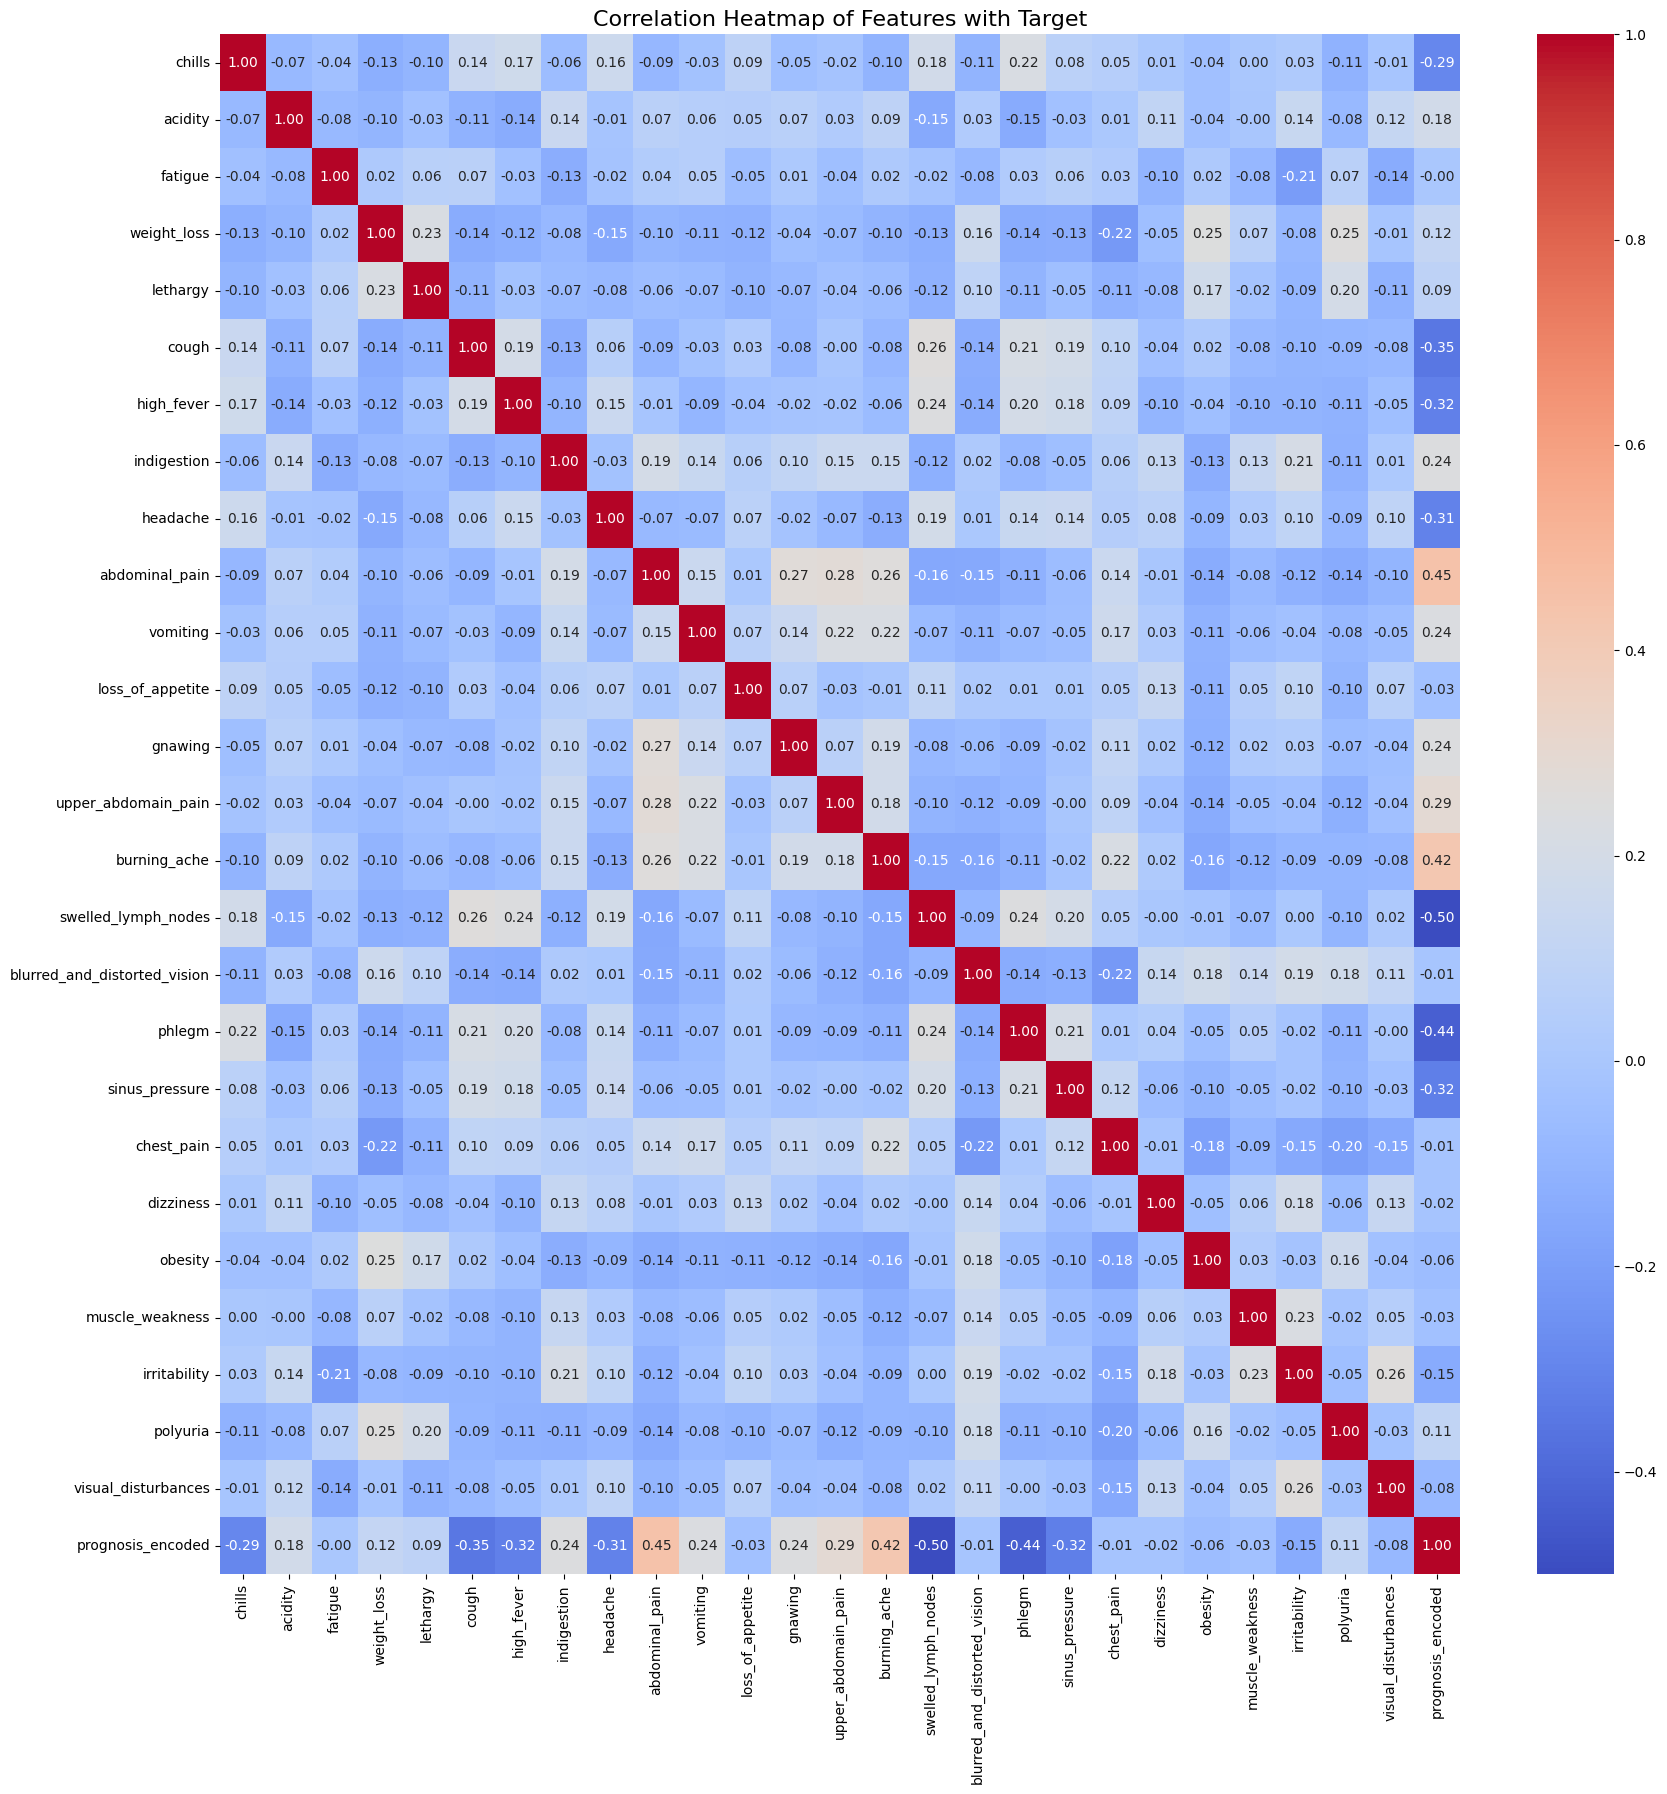

In [21]:
# Plot heatmap of the correlations (including the target)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features with Target', fontsize=16)
plt.show()

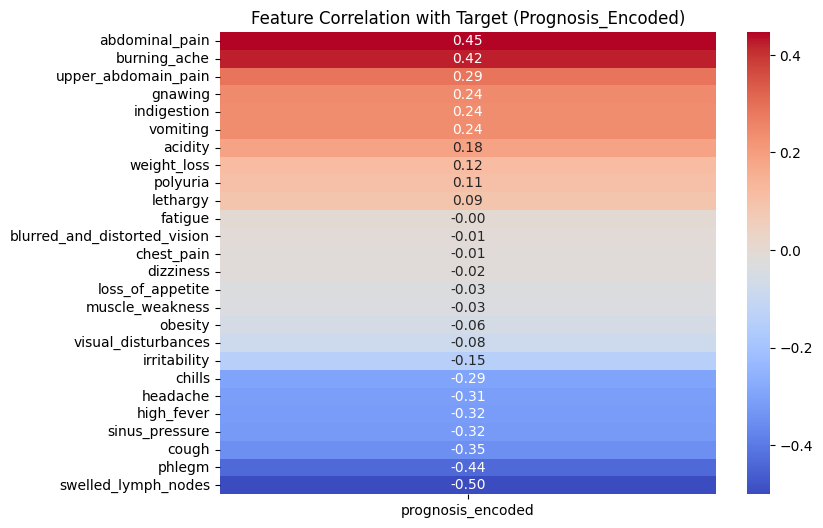

In [22]:
#Plot a focused heatmap with correlations between features and the target variable only
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation with Target (Prognosis_Encoded)')
plt.show()

In [23]:
# Check for non-binary values in binary columns
binary_columns = [col for col in data.columns if set(data[col].unique()).issubset({0, 1})]
for col in binary_columns:
    unique_values = data[col].unique()
    if not set(unique_values).issubset({0, 1}):
        print(f"Unexpected values in {col}: {unique_values}")

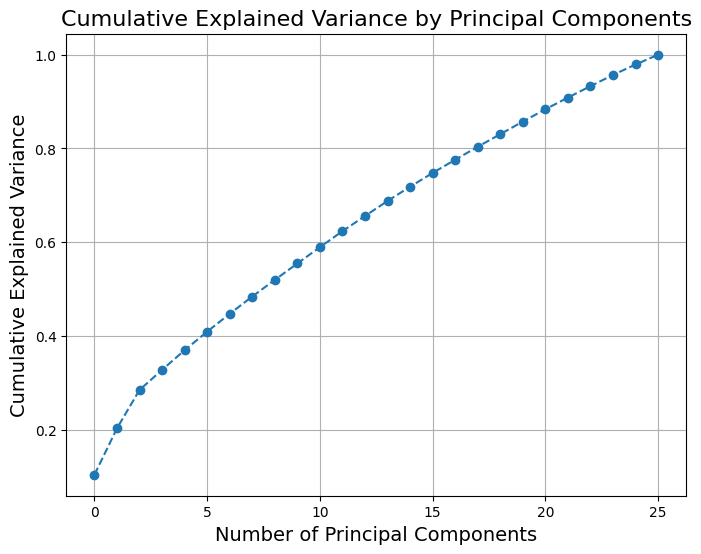

Number of components to retain 90% variance: 17
Shape of dataset after PCA: (728, 17)


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target
X = data_with_target.drop('prognosis_encoded', axis=1)  # Features
y = data_with_target['prognosis_encoded']              # Target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance by Principal Components', fontsize=16)
plt.grid()
plt.show()

# Choose number of components to retain 90% variance
n_components = next(i for i, cum_var in enumerate(cumulative_variance_ratio) if cum_var >= 0.75) + 1
print(f'Number of components to retain 90% variance: {n_components}')

# Reapply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Output the shape of the transformed dataset
print(f'Shape of dataset after PCA: {X_pca_optimal.shape}')

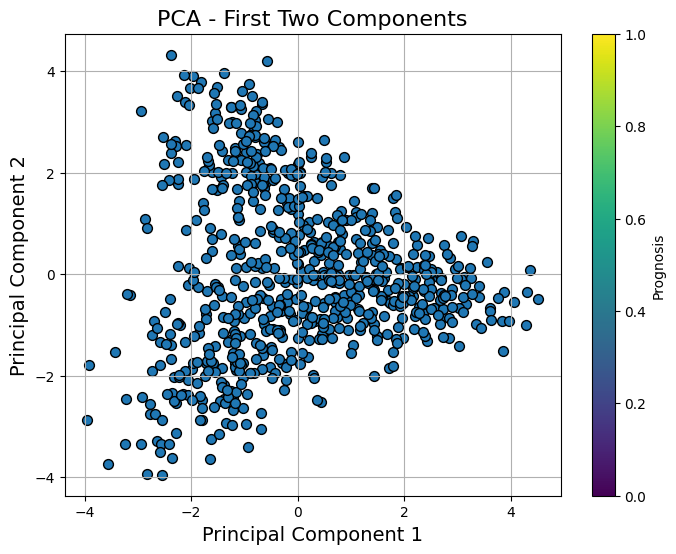

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA - First Two Components', fontsize=16)
plt.colorbar(label='Prognosis')
plt.grid()
plt.show()

In [26]:
# Get the PCA loading matrix
loading_matrix = pca_optimal.components_

import numpy as np

# Sum the absolute values of loadings for all retained components
feature_importance = np.sum(np.abs(loading_matrix), axis=0)

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#print all the features with their importance
print(feature_importance_df)

                         Feature  Importance
0                         chills    3.247356
11              loss_of_appetite    3.050041
10                      vomiting    3.035290
4                       lethargy    3.017631
1                        acidity    3.013155
12                       gnawing    3.001509
18                sinus_pressure    2.999258
21                       obesity    2.952466
13           upper_abdomain_pain    2.924662
2                        fatigue    2.920607
8                       headache    2.895704
22               muscle_weakness    2.844212
5                          cough    2.764002
7                    indigestion    2.755492
20                     dizziness    2.723709
24                      polyuria    2.631656
17                        phlegm    2.606228
6                     high_fever    2.540881
16  blurred_and_distorted_vision    2.473722
19                    chest_pain    2.460156
3                    weight_loss    2.459375
25        

In [27]:
# Define a threshold
threshold = 3.0  # Adjust based on your dataset

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]
print(selected_features)

             Feature  Importance
0             chills    3.247356
11  loss_of_appetite    3.050041
10          vomiting    3.035290
4           lethargy    3.017631
1            acidity    3.013155
12           gnawing    3.001509


In [28]:
# Check class distribution
class_distribution = y.value_counts()

# Display class distribution
print(class_distribution)

prognosis_encoded
1    200
0    197
3    179
2    152
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

# Split the PCA-transformed dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca_optimal, y, test_size=0.3, random_state=42, stratify=y
)

# Further split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Verify the shapes of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (509, 17), (509,)
Validation set: (109, 17), (109,)
Testing set: (110, 17), (110,)


In [30]:
# Check class distributions in splits
print("Training class distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation class distribution:")
print(y_val.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Training class distribution:
prognosis_encoded
1    0.275049
0    0.271120
3    0.245580
2    0.208251
Name: proportion, dtype: float64

Validation class distribution:
prognosis_encoded
1    0.275229
0    0.266055
3    0.247706
2    0.211009
Name: proportion, dtype: float64

Test class distribution:
prognosis_encoded
1    0.272727
0    0.272727
3    0.245455
2    0.209091
Name: proportion, dtype: float64



Evaluating Logistic Regression...

Training Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       138
           1       0.91      0.90      0.91       140
           2       0.93      0.93      0.93       106
           3       0.91      0.93      0.92       125

    accuracy                           0.93       509
   macro avg       0.93      0.93      0.93       509
weighted avg       0.93      0.93      0.93       509

Validation Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.92      0.77      0.84        30
           2       0.90      0.78      0.84        23
           3       0.78      0.93      0.85        27

    accuracy                           0.86       109
   macro avg       0.87      0.86      0.86       109
weighted avg       0.87      0.86      0.86       109

Test Repor

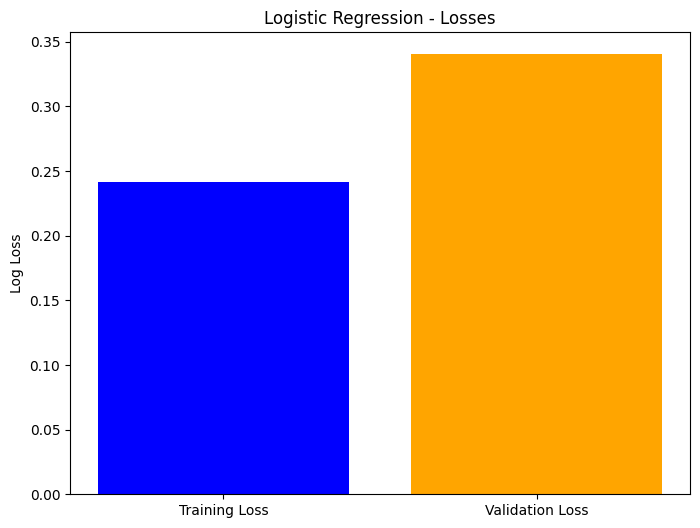


Evaluating SVM...

SVM - Training Loss: 0.1249, Validation Loss: 0.3470


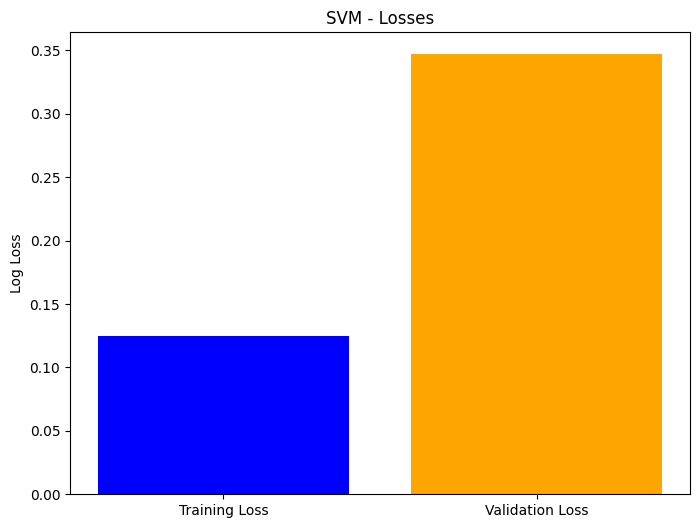


Evaluating KNN...

KNN - Training Loss: 0.2553, Validation Loss: 2.9326


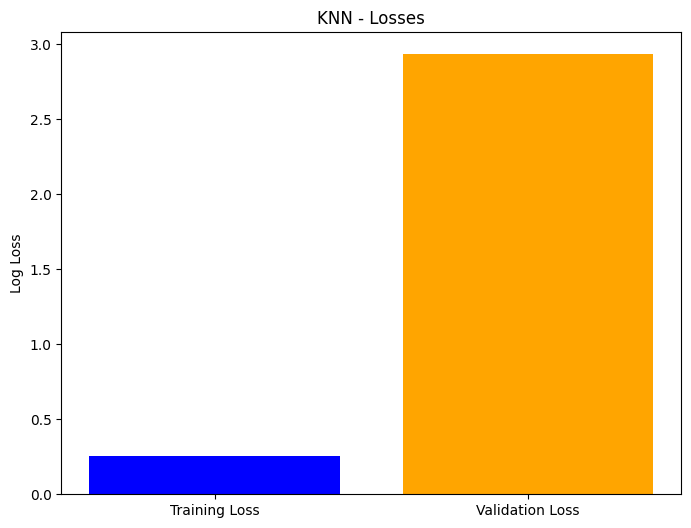


Evaluating Decision Tree...

Decision Tree - Training Loss: 0.2333, Validation Loss: 3.0698


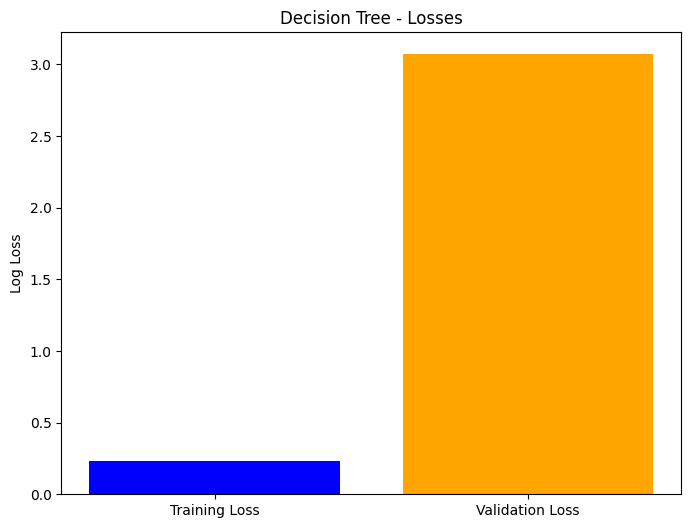


Evaluating Random Forest...

Random Forest - Training Loss: 0.1195, Validation Loss: 0.4761


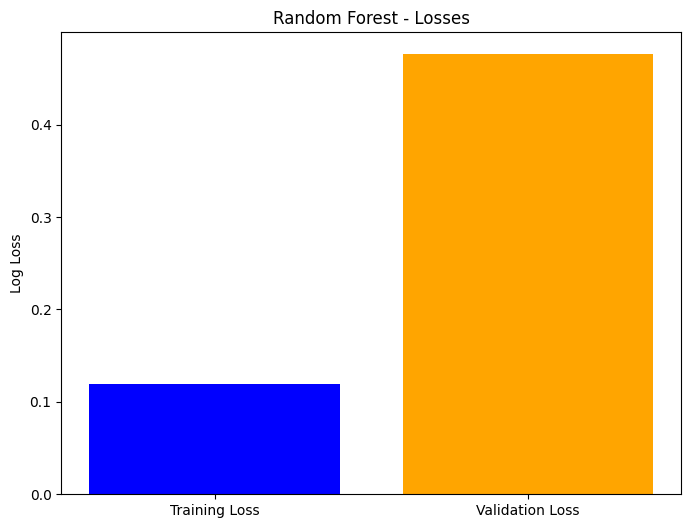


Evaluating XGBoost...

XGBoost - Training Loss: 0.0064, Validation Loss: 0.5551


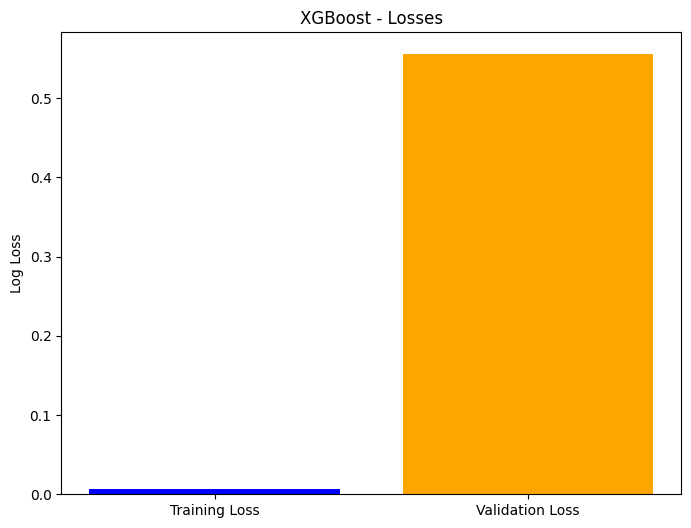


Evaluating MLP...

MLP - Training Loss: 0.0055, Validation Loss: 0.6133


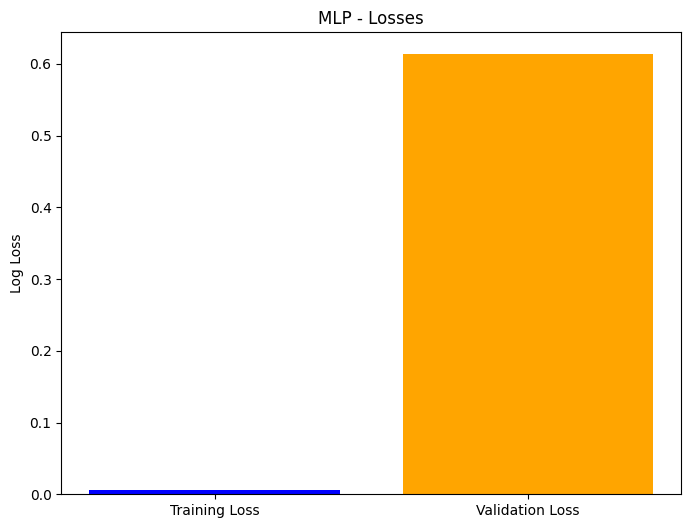

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Store models and their results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

results = {}

# Function to evaluate and plot
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)

    # Evaluate on training set
    y_train_pred = model.predict(X_train)
    train_report = classification_report(y_train, y_train_pred)

    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    val_report = classification_report(y_val, y_val_pred)

    # Evaluate on test set
    y_test_pred = model.predict(X_test)
    test_report = classification_report(y_test, y_test_pred)

    # Store results
    results[model.__class__.__name__] = {
        "Training Report": train_report,
        "Validation Report": val_report,
        "Test Report": test_report
    }

    print(f"\nTraining Report for {model.__class__.__name__}:\n", train_report)
    print(f"Validation Report for {model.__class__.__name__}:\n", val_report)
    print(f"Test Report for {model.__class__.__name__}:\n", test_report)


# Apply models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)

import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Function to calculate training and validation losses
def calculate_loss(model, X_train, y_train, X_val, y_val, model_name):
    # Predict probabilities if available, otherwise fallback to predictions
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)
        y_val_proba = model.predict_proba(X_val)
    elif hasattr(model, "decision_function"):
        y_train_proba = model.decision_function(X_train)
        y_val_proba = model.decision_function(X_val)
    else:
        y_train_proba = model.predict(X_train)
        y_val_proba = model.predict(X_val)

    # Compute losses
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)

    print(f"\n{model_name} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    return train_loss, val_loss

# Initialize losses for plotting
training_losses = {}
validation_losses = {}

# Function to evaluate and plot loss curves for each model
def evaluate_and_plot(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)

    # Calculate training and validation losses
    train_loss, val_loss = calculate_loss(model, X_train, y_train, X_val, y_val, model_name)

    # Store losses
    training_losses[model_name] = train_loss
    validation_losses[model_name] = val_loss

    # Plot losses for each model
    plt.figure(figsize=(8, 6))
    plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'orange'])
    plt.title(f'{model_name} - Losses')
    plt.ylabel('Log Loss')
    plt.show()

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Loop through models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_and_plot(model, X_train, y_train, X_val, y_val, name)



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')

# Perform GridSearchCV
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best model
best_lr = grid_lr.best_estimator_

# Get predictions
y_train_pred = best_lr.predict(X_train)
y_val_pred = best_lr.predict(X_val)

# Print classification reports
print("Logistic Regression Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nLogistic Regression Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       138
           1       0.92      0.89      0.91       140
           2       0.93      0.94      0.93       106
           3       0.91      0.93      0.92       125

    accuracy                           0.93       509
   macro avg       0.93      0.93      0.93       509
weighted avg       0.93      0.93      0.93       509


Logistic Regression Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.92      0.77      0.84        30
           2       0.90      0.78      0.84        23
           3       0.78      0.93      0.85        27

    accuracy                           0.86       109
   macro avg       0.87      0.86      0.86       109
weighted avg       0.87      0.86      0.86       109



In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,          # Limit depth
    min_samples_leaf=3,   # Increase leaf size
    max_features='sqrt',  # or a fraction, e.g., 0.5
    random_state=42
)

rf_model.fit(X_train, y_train)

#get predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

#print classification report
print("Random Forest Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nRandom Forest Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       138
           1       0.96      0.89      0.92       140
           2       0.95      0.94      0.95       106
           3       0.94      0.94      0.94       125

    accuracy                           0.94       509
   macro avg       0.94      0.94      0.94       509
weighted avg       0.94      0.94      0.94       509


Random Forest Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.85      0.73      0.79        30
           2       0.95      0.83      0.88        23
           3       0.74      0.85      0.79        27

    accuracy                           0.84       109
   macro avg       0.85      0.84      0.85       109
weighted avg       0.85      0.84      0.84       109



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

rfc = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='accuracy',     # or f1_macro, etc.
    cv=skf,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)

print("\nRandom Forest Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

#print the training accuracy
y_train_pred = best_rf.predict(X_train)
print("\nRandom Forest Training Classification Report:")
print(classification_report(y_train, y_train_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Score: 0.8840419336051253

Random Forest Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.88      0.77      0.82        30
           2       0.95      0.83      0.88        23
           3       0.77      0.85      0.81        27

    accuracy                           0.85       109
   macro avg       0.86      0.85      0.85       109
weighted avg       0.86      0.85      0.85       109


Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       138
           1       0.94      0.87      0.90       140
           2       0.94      0.92      0.93       106
           3       0.94      0.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [100],     # Keeping stable
    'max_depth': [3],          # Optimal depth found
    'min_samples_split': [5],  # Stable value
    'min_samples_leaf': [5, 7], # Testing larger leaf size
    'max_features': ['sqrt'],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)
y_train_pred = best_rf.predict(X_train)

print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)
print("\nRandom Forest Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("\nRandom Forest Training Classification Report:")
print(classification_report(y_train, y_train_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'class_weight': 'balanced_subsample', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score: 0.8820811492913998

Random Forest Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.88      0.73      0.80        30
           2       1.00      0.83      0.90        23
           3       0.77      0.85      0.81        27

    accuracy                           0.84       109
   macro avg       0.86      0.84      0.85       109
weighted avg       0.86      0.84      0.84       109


Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       138
           1       0.94      0.83      0.88       140
           2       0.94      0.92      0.93       10

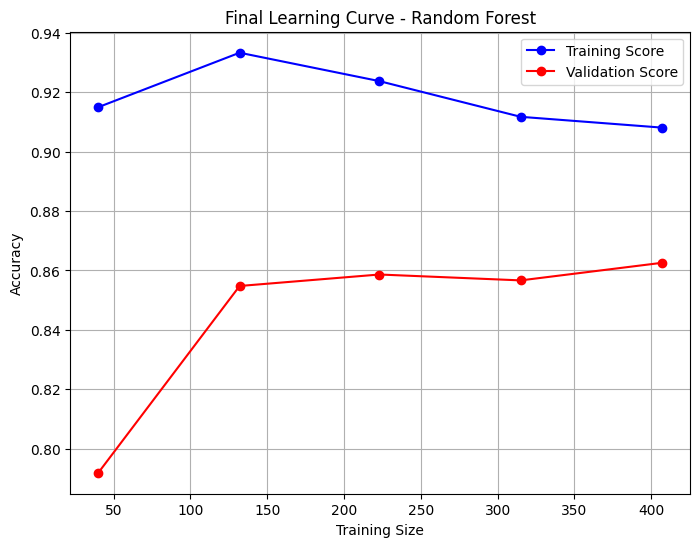

In [41]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color='blue')
plt.plot(train_sizes, val_mean, 'o-', label="Validation Score", color='red')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Final Learning Curve - Random Forest")
plt.grid(True)
plt.show()